https://udlbook.github.io/udlbook/

https://github.com/udlbook/udlbook/blob/main/Notebooks/Chap06/6_2_Gradient_Descent.ipynb

# **Блокнот 6.2: Градиентный спуск (gradient descent)**

В этом блокноте воссоздан алгоритм градиентного спуска, как показано на рисунке 6.1.

Пройдитесь по ячейкам ниже, запуская каждую ячейку по очереди. В разных местах вы увидите метку "TODO". Следуйте инструкциям в этих местах и сделайте прогнозы о том, что произойдет, или напишите код для выполнения функций.


In [25]:
# импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [26]:
# Давайте создадим наши обучающие данные из 12 пар {x_i, y_i}
# Мы попытаемся подогнать линейную модель по этим данным
data = np.array([[0.03,0.19,0.34,0.46,0.78,0.81,1.08,1.18,1.39,1.60,1.65,1.90],
                 [0.67,0.85,1.05,1.00,1.40,1.50,1.30,1.54,1.55,1.68,1.73,1.60]])

In [27]:
# Давайте определим нашу модель - просто прямую линию с пересечением (intercept) phi[0] и наклоном (slope) phi[1]
def model(phi,x):
  y_pred = phi[0]+phi[1] * x
  return y_pred

In [28]:
# Нарисуем модель
def draw_model(data,model,phi,title=None):
  x_model = np.arange(0,2,0.01)
  y_model = model(phi,x_model)

  fix, ax = plt.subplots()
  ax.plot(data[0,:],data[1,:],'bo')
  ax.plot(x_model,y_model,'m-')
  ax.set_xlim([0,2]);ax.set_ylim([0,2])
  ax.set_xlabel('x'); ax.set_ylabel('y')
  ax.set_aspect('equal')
  if title is not None:
    ax.set_title(title)
  plt.show()

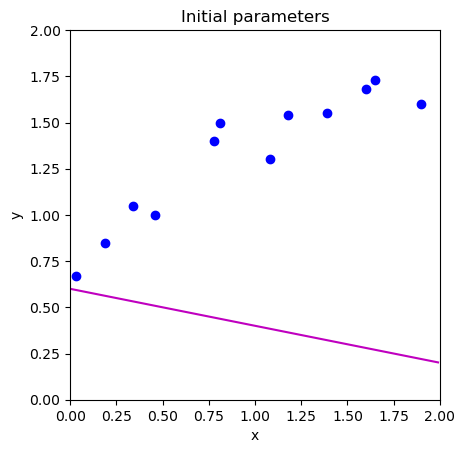

In [29]:
# Инициализируем параметры некоторыми произвольными значениями и нарисуем модель
phi = np.zeros((2,1))
phi[0] = 0.6      # Intercept
phi[1] = -0.2      # Slope
draw_model(data,model,phi, "Initial parameters")


Теперь давайте напишем код вычисления квадратичной функции потерь

In [33]:
def compute_loss(data_x, data_y, model, phi):
  # TODO -- Напишите эту функцию -- замените строки ниже
  # Сначала сделайте предсказания модели на основе данных x
  # Затем вычислите квадраты разницы между предсказаниями и истинными значениями y
  # Затем просуммируйте их все и верните из функции
  pred_y = model(phi, data_x)
  loss = np.sum((pred_y - data_y) ** 2)

  return loss

Давайте проверим, правильно ли мы это сделали

In [34]:
loss = compute_loss(data[0,:],data[1,:],model,np.array([[0.6],[-0.2]]))
print('Your loss = %3.3f, Correct loss = %3.3f'%(loss, 12.367))

Your loss = 12.367, Correct loss = 12.367


Теперь давайте построим весь график функции потерь

In [35]:
def draw_loss_function(compute_loss, data,  model, phi_iters = None):
  # Определим красивую цветовую схему
  my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
  my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
  r = np.floor(my_colormap_vals_dec/(256*256))
  g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
  b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
  my_colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)

  # Создадим сетку значений пересечения/наклона (intercept/slope) для построения графика
  intercepts_mesh, slopes_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.002))
  loss_mesh = np.zeros_like(slopes_mesh)
  # Вычислим функцию потерь для каждого набора параметров
  for idslope, slope in np.ndenumerate(slopes_mesh):
     loss_mesh[idslope] = compute_loss(data[0,:], data[1,:], model, np.array([[intercepts_mesh[idslope]], [slope]]))

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(intercepts_mesh,slopes_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(intercepts_mesh,slopes_mesh,loss_mesh,40,colors=['#80808080'])
  if phi_iters is not None:
    ax.plot(phi_iters[0,:], phi_iters[1,:],'go-')
  ax.set_ylim([1,-1])
  ax.set_xlabel('Intercept $\phi_{0}$'); ax.set_ylabel('Slope, $\phi_{1}$')
  plt.show()

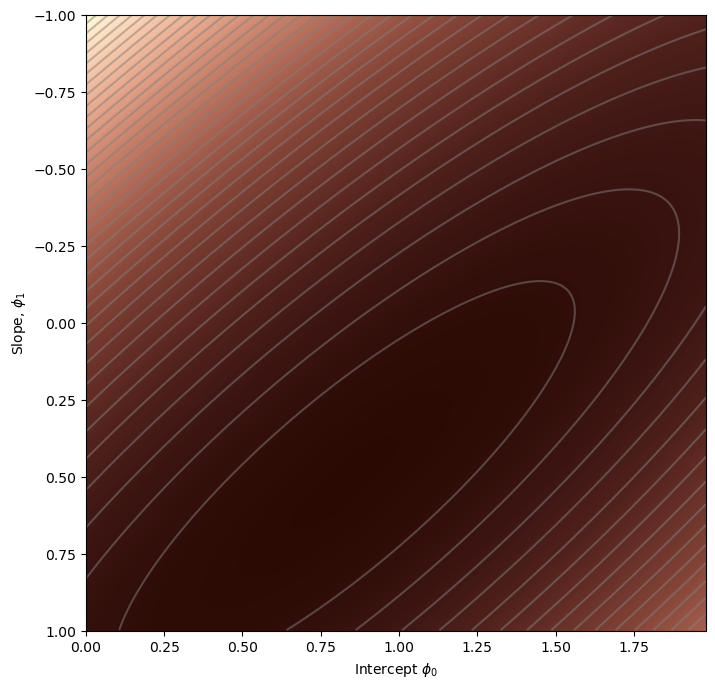

In [36]:
draw_loss_function(compute_loss, data, model)

Теперь давайте вычислим вектор градиента для заданного набора параметров:

\begin{equation}
\frac{\partial L}{\partial \boldsymbol\phi} = \begin{bmatrix}\frac{\partial L}{\partial \phi_0} \\\frac{\partial L}{\partial \phi_1} \end{bmatrix}.
\end{equation}

In [37]:
# Составляющие вектора градиента приведены в книге, но стоит попробовать рассчитать их самостоятельно, чтобы
# убедиться, что вы все правильно поняли. Запишите выражение для суммы квадратов потерь и возьмите
# производную по phi0 и phi1
def compute_gradient(data_x, data_y, phi):
    # TODO -- напишите эту функцию, заменив строки ниже
    dl_dphi0 = np.sum(2 * (phi[0] + phi[1] * data_x - data_y))
    dl_dphi1 = np.sum(2 * data_x * (phi[0] + phi[1] * data_x - data_y))

    # Возвращаем градиент
    return np.array([[dl_dphi0],[dl_dphi1]])

Мы можем проверить, что все сделали правильно, используя трюк, известный как **конечные разности**.  Если мы вычислим функцию, а затем изменим один из параметров на очень малую величину и поделим на эту величину, мы получим приближение к градиенту, так что:

\begin{align}
\frac{\partial L}{\partial \phi_{0}}&\approx & \frac{L[\phi_0+\delta, \phi_1]-L[\phi_0, \phi_1]}{\delta}\\
\frac{\partial L}{\partial \phi_{1}}&\approx & \frac{L[\phi_0, \phi_1+\delta]-L[\phi_0, \phi_1]}{\delta}
\end{align}


Мы не можем этого сделать, когда параметров много; для миллиона параметров нам пришлось бы вычислять функцию потерь два миллиона раз, и обычно прямое вычисление градиентов намного эффективнее.

In [38]:
# Вычислим градиент, используя нашу функцию
gradient = compute_gradient(data[0,:],data[1,:], phi)
print("Your gradients: (%3.3f,%3.3f)"%(gradient[0],gradient[1]))
# Аппроксимируем градиенты конечными разностями
delta = 0.0001
dl_dphi0_est = (compute_loss(data[0,:],data[1,:],model,phi+np.array([[delta],[0]])) - \
                    compute_loss(data[0,:],data[1,:],model,phi))/delta
dl_dphi1_est = (compute_loss(data[0,:],data[1,:],model,phi+np.array([[0],[delta]])) - \
                    compute_loss(data[0,:],data[1,:],model,phi))/delta
print("Approx gradients: (%3.3f,%3.3f)"%(dl_dphi0_est,dl_dphi1_est))
# В последней значимой цифре могут быть небольшие различия, поскольку конечные градиенты являются приближением

Your gradients: (-21.904,-26.840)
Approx gradients: (-21.903,-26.839)


/tmp/ipykernel_10021/3536263839.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Your gradients: (%3.3f,%3.3f)"%(gradient[0],gradient[1]))


Теперь мы готовы выполнить градиентный спуск.  Нам нужно будет использовать нашу процедуру линейного поиска из блокнота 6.1, которую мы воспроизводим здесь, плюс вспомогательную функцию loss_function_1D, которая сопоставляет поиск по направлению отрицательного градиента в двумерном пространстве с задачей 1D (расстояние вдоль этого направления)

In [39]:
def loss_function_1D(dist_prop, data, model, phi_start, search_direction):
  # Вернем потерю после того, как продвинулись
  return compute_loss(data[0,:], data[1,:], model, phi_start+ search_direction * dist_prop)

def line_search(data, model, phi, gradient, thresh=.00001, max_dist = 0.1, max_iter = 15, verbose=False):
    # Инициализируем четыре точки диапазона, вдоль которого мы собираемся искать
    a = 0
    b = 0.33 * max_dist
    c = 0.66 * max_dist
    d = 1.0 * max_dist
    n_iter = 0;

    # Пока мы не нашли минимум достаточно точно
    while np.abs(b-c) > thresh and n_iter < max_iter:
        # Увеличим счетчик итераций (просто чтобы предотвратить бесконечный цикл)
        n_iter = n_iter+1
        # Вычислим все четыре точки
        lossa = loss_function_1D(a, data, model, phi,gradient)
        lossb = loss_function_1D(b, data, model, phi,gradient)
        lossc = loss_function_1D(c, data, model, phi,gradient)
        lossd = loss_function_1D(d, data, model, phi,gradient)

        if verbose:
          print('Iter %d, a=%3.3f, b=%3.3f, c=%3.3f, d=%3.3f'%(n_iter, a,b,c,d))
          print('a %f, b%f, c%f, d%f'%(lossa,lossb,lossc,lossd))

        # Правило #1 Если ВЫСОТА в точке A меньше высоты в точках B, C и D, то уменьшим значения B, C и D вдвое
        if np.argmin((lossa,lossb,lossc,lossd))==0:
          b = b/2
          c = c/2
          d = d/2
          continue;

        # Правило #2 Если ВЫСОТА в точке b меньше высоты в точке c, то
        #                     тогда точка d становится точкой c,
        #                     точка b становится на 1/3 между a и новым d
        #                     точка c становится на 2/3 между a и новым d
        if lossb < lossc:
          d = c
          b = a+ (d-a)/3
          c = a+ 2*(d-a)/3
          continue

        # Правило #3 Если ВЫСОТА в точке c меньше высоты в точке b, то
        #                     тогда точка a становится точкой b,
        #                     точка b становится на 1/3 между новыми a и d
        #                     точка c становится на 2/3 между новыми a и d
        a = b
        b = a+ (d-a)/3
        c = a+ 2*(d-a)/3

    # Вернем среднее значение двух средних точек
    return (b+c)/2.0

In [45]:
def gradient_descent_step(phi, data,  model):
    # TODO -- обновите Phi шагом градиентного спуска (уравнение 6.3)
    # 1. Вычислите градиент (вы написали эту функцию выше)
    # 2. Найдите наилучший размер шага alpha, используя функцию линейного поиска (выше) - используйте отрицательный градиент при спуске вниз
    # 3. Обновите параметры phi на основе градиента и размера шага alpha.
    gradient = compute_gradient(data[0, :],data[1, :], phi)
    alpha = line_search(data, model, phi, -gradient)
    phi = phi - alpha * gradient

    return phi

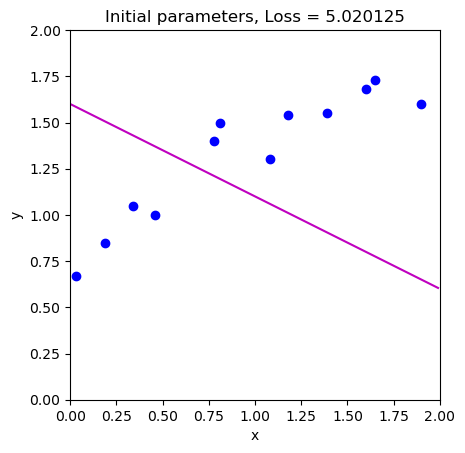

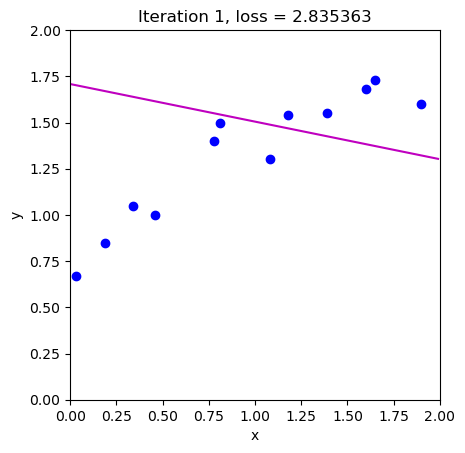

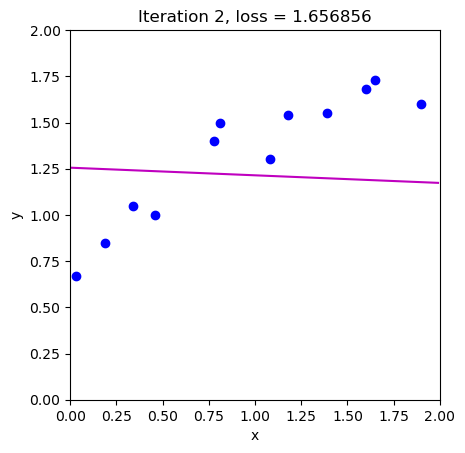

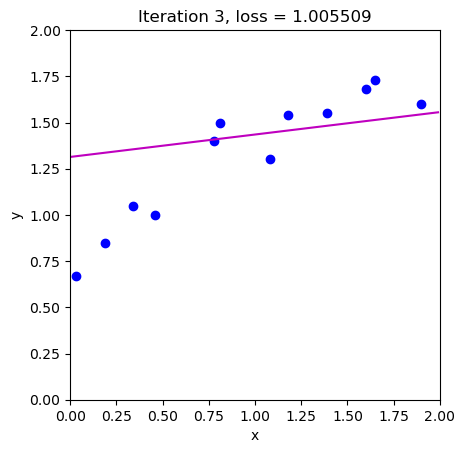

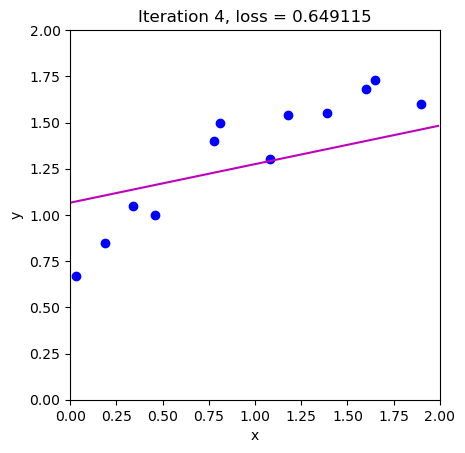

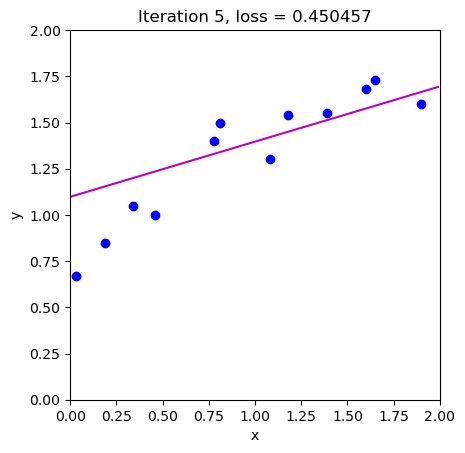

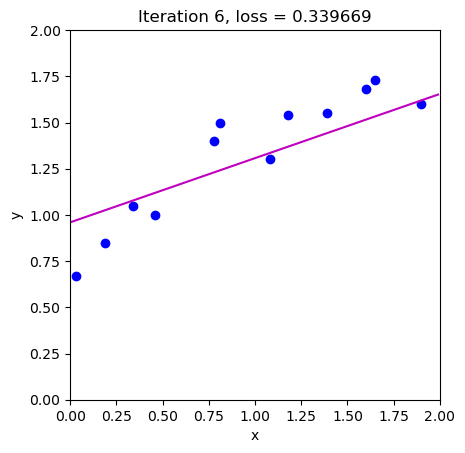

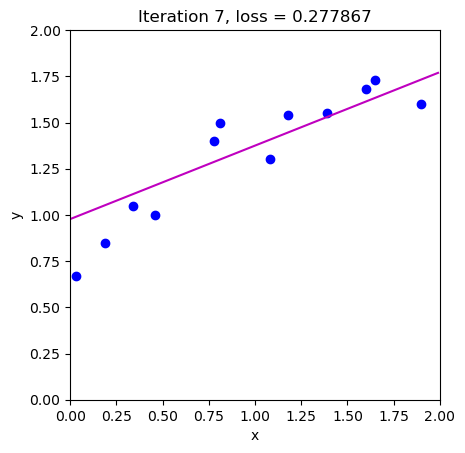

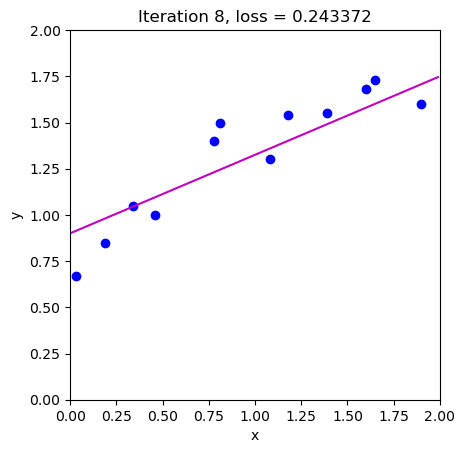

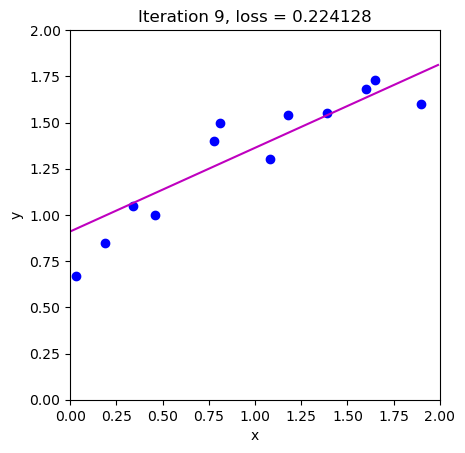

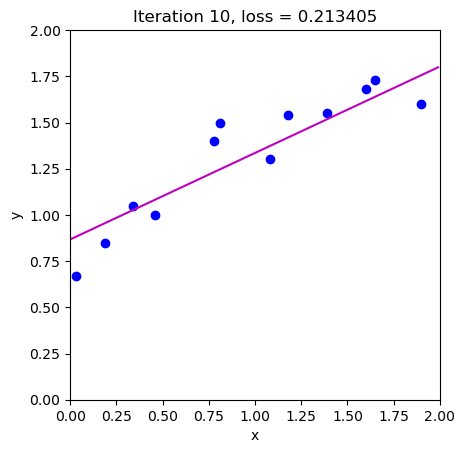

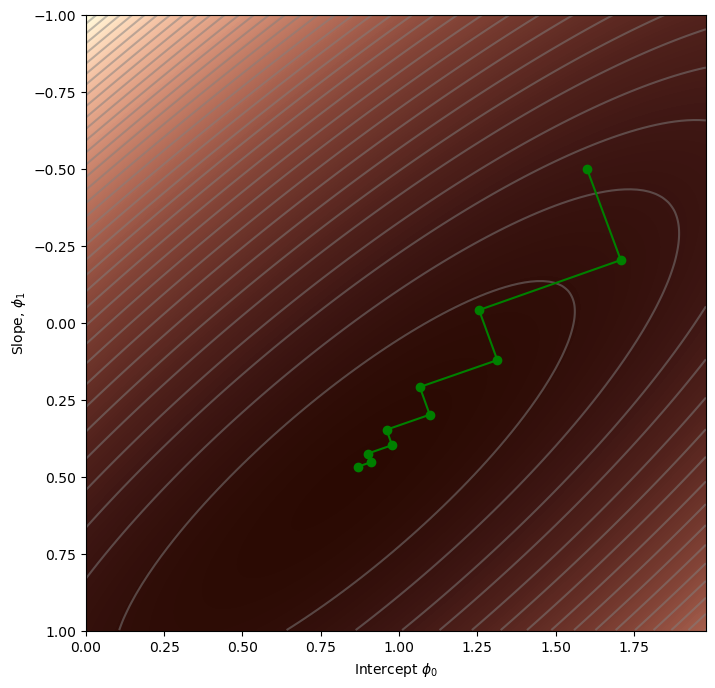

In [46]:
# Инициализируем параметры и нарисуем модель
n_steps = 10
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = 1.6
phi_all[1,0] = -0.5

# Измерим потери (loss) и нарисуем исходную модель
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

# Многократно выполним шаги градиентного спуска
for c_step in range(n_steps):
  # Выполним шаг градиентного спуска
  phi_all[:,c_step+1:c_step+2] = gradient_descent_step(phi_all[:,c_step:c_step+1],data, model)
  # Измерим потери (loss) и нарисуем модель
  loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
  draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

# Нарисуем траекторию по функции потерь
draw_loss_function(compute_loss, data, model,phi_all)
